# Receptive field maker example

Load the MUTAG dataset :

In [2]:
from data_loader import load_local_data
import networkx as nx
from utils import graph_colors
import matplotlib.pyplot as plt
from pscn import ReceptiveFieldMaker

Using TensorFlow backend.


In [2]:
mutag_dataset=load_local_data('./data','mutag')
X,y=zip(*mutag_dataset)

X is a list of Graph objects and y the list of the classes

In [3]:
nx_g=X[0].nx_graph

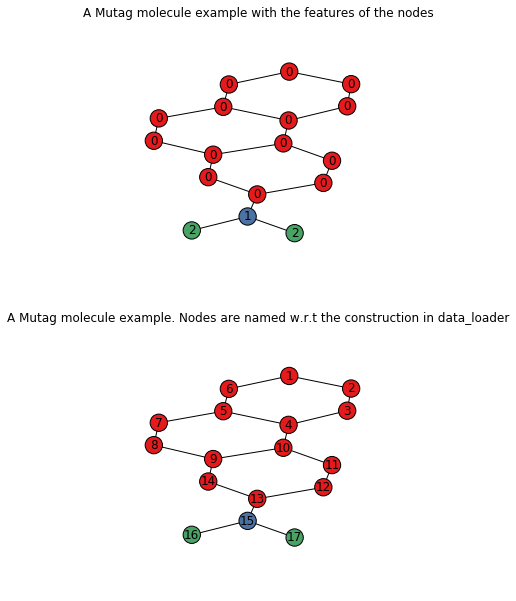

In [4]:
plt.figure(figsize=(5,10))
pos=nx.layout.kamada_kawai_layout(nx_g)
plt.subplot(2,1,1)
nx.draw(nx_g
        ,pos=pos
        ,with_labels=True
        ,labels=nx.get_node_attributes(nx_g,'attr_name') #the features of the nodes are named 'attr_name' by default
       ,node_color=graph_colors(nx_g))
plt.title('A Mutag molecule example with the features of the nodes')
plt.subplot(2,1,2)
nx.draw(nx_g
        ,pos=pos
        ,with_labels=True
       ,node_color=graph_colors(nx_g))
plt.title('A Mutag molecule example. Nodes are named w.r.t the construction in data_loader')
plt.show()

### Receptive field maker example

In [5]:
rf_maker=ReceptiveFieldMaker(nx_g,w=10,k=5)

Using the procedure described in the paper we normalize the graph from the root 15 (for e.g)

In [6]:
nx_normalized=rf_maker.normalize_graph(nx_g,vertex=15)

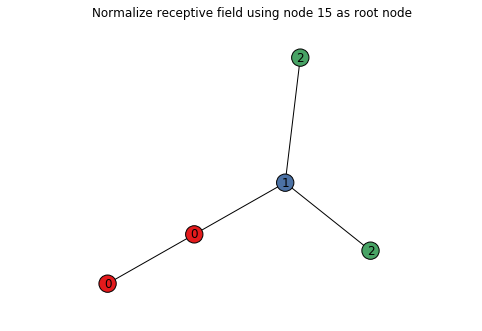

In [7]:
pos=nx.layout.kamada_kawai_layout(nx_normalized)
nx.draw(nx_normalized
        ,pos=pos
        ,with_labels=True
        ,labels=nx.get_node_attributes(nx_normalized,'attr_name')
       ,node_color=graph_colors(nx_normalized))
plt.title('Normalize receptive field using node 15 as root node')
plt.show()

The labeling attribute is the order to respect for the CNN :

In [8]:
nx_normalized.nodes(data=True)

NodeDataView({0: {'attr_name': 2, 'labeling': 3}, 1: {'attr_name': 2, 'labeling': 4}, 2: {'attr_name': 0, 'labeling': 2}, 3: {'attr_name': 0, 'labeling': 5}, 4: {'attr_name': 1, 'labeling': 1}})

We relabel the nodes with respect to the labeling order :

In [9]:
nx_relabel=nx.relabel_nodes(nx_normalized,nx.get_node_attributes(nx_normalized,'labeling'))

The following vector is going to be fed to the 1D-CNN

In [10]:
[x[1] for x in sorted(nx.get_node_attributes(nx_relabel,'attr_name').items(),key=lambda x:x[0])]

[1, 0, 2, 2, 0]

In [11]:
forcnn=rf_maker.make_()

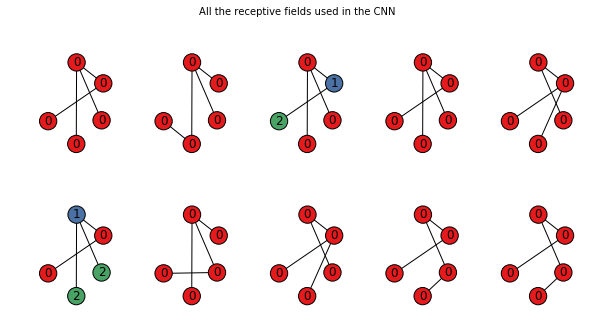

In [12]:
plt.figure(figsize=(10,5))
for i in range(len(rf_maker.all_subgraph)):
    g=rf_maker.all_subgraph[i]
    pos=nx.layout.kamada_kawai_layout(nx_g)
    plt.subplot(2,5,i+1)
    nx.draw(g
            ,pos=pos
            ,with_labels=True
            ,labels=nx.get_node_attributes(g,'attr_name') 
           ,node_color=graph_colors(g))
plt.suptitle('All the receptive fields used in the CNN')
plt.show()

For discrete attributes we rather feed the CNN with the one_hot attributes :

In [13]:
rf_maker=ReceptiveFieldMaker(nx_g,w=10,k=5,one_hot=7) #one_hot is the number of different attributes when they are discrete

In [14]:
rf_maker.make_()

[[array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.])],
 [array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.])],
 [array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.])],
 [array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.])],
 [array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  